In [1]:
import os

# Create 'plots' folder if not already present
os.makedirs('plots', exist_ok=True)


/tmp/ipython-input-2-228730339.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="viridis")
/tmp/ipython-input-2-228730339.py:58: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-228730339.py:59: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('plots/avg_pnl_by_sentiment.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


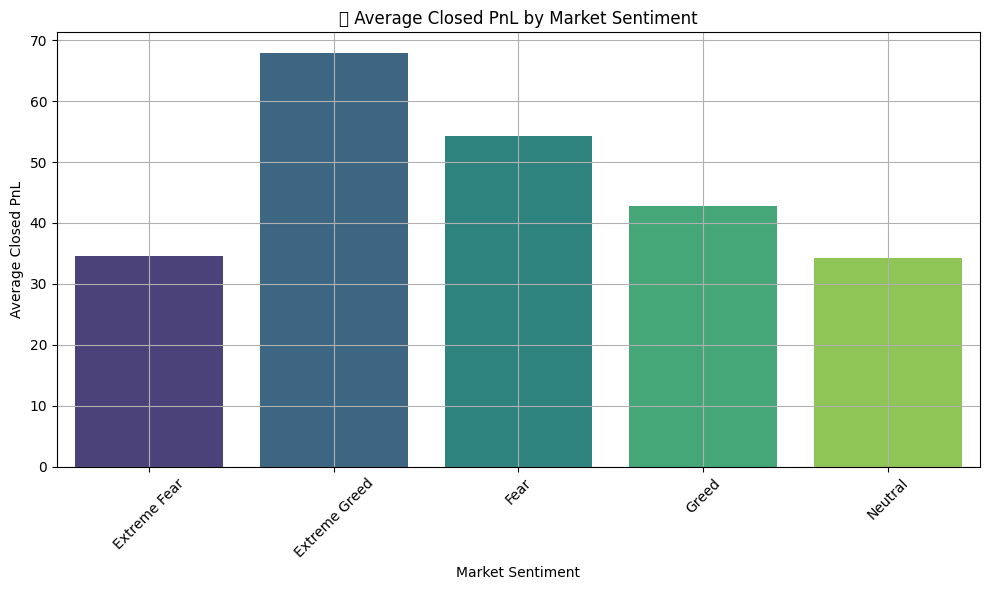

/tmp/ipython-input-2-228730339.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Classification', y='Closed PnL', data=merged_df, palette="Set2")
/tmp/ipython-input-2-228730339.py:70: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-228730339.py:71: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig('plots/pnl_distribution_boxplot.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


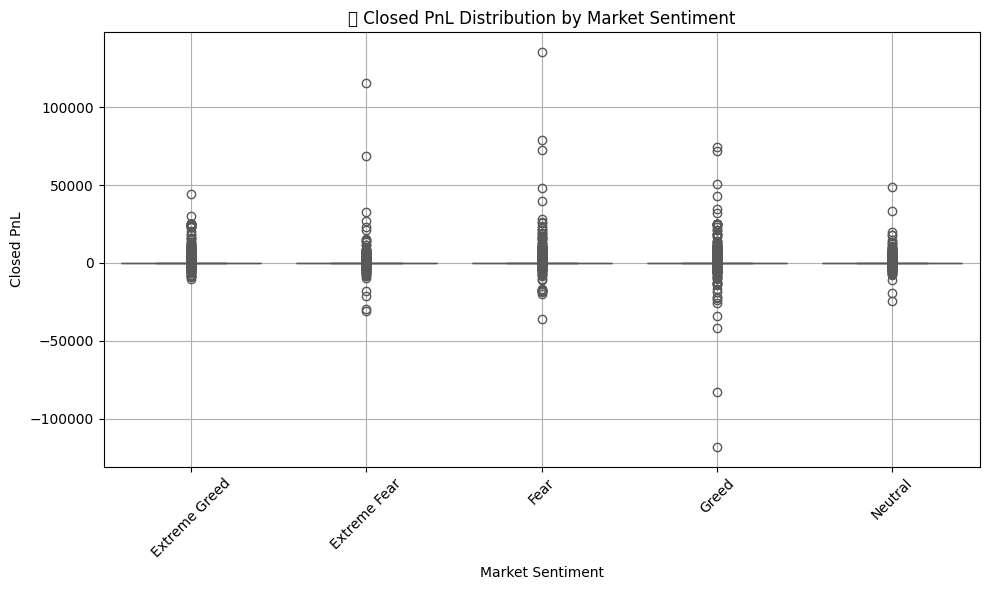

/tmp/ipython-input-2-228730339.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size.index, y=avg_size.values, palette="coolwarm")
/tmp/ipython-input-2-228730339.py:82: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-228730339.py:83: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.savefig('plots/avg_size_by_sentiment.png')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


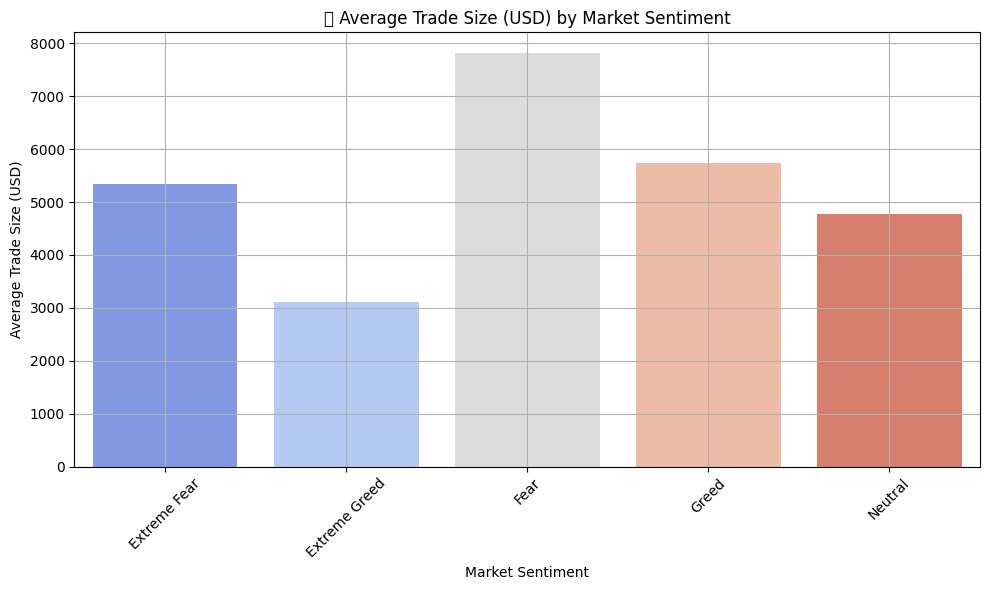

✅ Average Closed PnL by Sentiment:
 Classification
Extreme Fear     34.54
Extreme Greed    67.89
Fear             54.29
Greed            42.74
Neutral          34.31
Name: Closed PnL, dtype: float64

📈 Trade Counts by Sentiment:
 Classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64

💰 Average Trade Size by Sentiment:
 Classification
Extreme Fear     5349.73
Extreme Greed    3112.25
Fear             7816.11
Greed            5736.88
Neutral          4782.73
Name: Size USD, dtype: float64

👤 Sample Account-wise PnL by Sentiment:
 Classification                              Extreme Fear  Extreme Greed  \
Account                                                                   
0x083384f897ee0f19899168e3b1bec365f52a9012       1247.69         -42.63   
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd        -24.91          43.22   
0x271b280974205ca63b716753467d5a371de622ab         20.96        

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# 1. Load Datasets
# ---------------------------
sentiment_df = pd.read_csv("fear_greed_index.csv")
trader_df = pd.read_csv("historical_data.csv")

# ---------------------------
# 2. Preprocess Sentiment Data
# ---------------------------
sentiment_df = sentiment_df[['date', 'classification']].copy()
sentiment_df.rename(columns={'date': 'Date', 'classification': 'Classification'}, inplace=True)
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date']).dt.date

# ---------------------------
# 3. Preprocess Trader Data
# ---------------------------
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M')
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date

# ---------------------------
# 4. Merge Datasets on Date
# ---------------------------
merged_df = trader_df.merge(sentiment_df, left_on='trade_date', right_on='Date', how='left')
merged_df = merged_df.dropna(subset=['Classification'])  # Remove trades without matching sentiment

# ---------------------------
# 5. Analysis
# ---------------------------

# A. Average PnL by Sentiment
avg_pnl = merged_df.groupby('Classification')['Closed PnL'].mean()

# B. Trade Counts per Sentiment
trade_counts = merged_df['Classification'].value_counts()

# C. Average Trade Size (USD) per Sentiment
avg_size = merged_df.groupby('Classification')['Size USD'].mean()

# D. Account-wise Average PnL by Sentiment
account_perf = merged_df.groupby(['Account', 'Classification'])['Closed PnL'].mean().unstack()

# ---------------------------
# 6. Visualizations
# ---------------------------

# A. Bar Plot: Average PnL by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pnl.index, y=avg_pnl.values, palette="viridis")
plt.title("📊 Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/avg_pnl_by_sentiment.png')
plt.show()

# B. Box Plot: Distribution of PnL per Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Classification', y='Closed PnL', data=merged_df, palette="Set2")
plt.title("📦 Closed PnL Distribution by Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/pnl_distribution_boxplot.png')
plt.show()

# C. Bar Plot: Avg Trade Size (USD) by Sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_size.index, y=avg_size.values, palette="coolwarm")
plt.title("💰 Average Trade Size (USD) by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/avg_size_by_sentiment.png')
plt.show()

# ---------------------------
# 7. Summary Printouts
# ---------------------------
print("✅ Average Closed PnL by Sentiment:\n", avg_pnl.round(2))
print("\n📈 Trade Counts by Sentiment:\n", trade_counts)
print("\n💰 Average Trade Size by Sentiment:\n", avg_size.round(2))
print("\n👤 Sample Account-wise PnL by Sentiment:\n", account_perf.head().round(2))
